In [9]:
from packages.display.core import *
%pylab inline
pylab.rcParams['figure.figsize'] = (200, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
%qtconsole

# Testing Band 9

## Creation of Data Cubes

Creation of the Synthetic Data Cubes ALMA-like using ASYDO Project.
Parameters:

 - isolist    : subset of the list of isotopes to generate a cube

 cube_params:

 - freq    : spectral center (frequency)
 - alpha   : right-ascension center (degrees
 - delta   : declination center (degrees
 - spe_res : spectral resolution (MHz)
 - spe_bw  : spectral bandwidth (MHz)
 - s_f, s_a : skew-normal distrib, s_f: full width at half maximum, alpha: curtosis parameter. 

In [10]:
cube_params = {
  'freq'     : 604000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 4000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 1}

To select the isolist, the wavelength range of the cube is obtained, and a searching from theoretical catalog Splatalogue is performed. All the isotopes that have spectral lines on the range of the cube are determinated.

In [4]:
# freq_init = cube_params['freq'] - cube_params['spe_bw']/2.0
# freq_end = cube_params['freq'] + cube_params['spe_bw']/2.0

# molist_present = theoretical_presence(molist, freq_init, freq_end)

Then, we get all the possible combination sets of the previously determined isotopes.

In [5]:
# all_subsets = sum(map(lambda r: list(combinations(molist_present, r)),
#                                 range(1, len(molist_present)+1)), [])

Finally, random sets previously determinated are selected in order to generate the data cubes.

In [6]:
# random_index = np.random.randint(len(all_subsets), size=25)

# isolist = []
# for i in random_index:
#     isolist.append(all_subsets[i])
    
# save_isolist(isolist)

In [7]:
# isolist = load_isolist()

### Generate Datacubes in Band 9, Fixed Width

In [8]:
# log=open('data/isolist_fixed_width.log', 'w')
# cube_n = 0
# cube_name = 'data/cube_fixed_width_'
# for i in range(0, 25):

    # Creation of the cube
#    gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
#    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
#    cube_n += 1
# log.close()

### Generate Datacubes in Band 9, Variable (TO DO: Fix variable width in ASYDO) Width

In [9]:
# log=open('data/isolist_variable_width.log', 'w')
# cube_n = 25
# cube_name = 'data/cube_variable_width_'
# for i in range(0, 25):

    # Creation of the cube
#     gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))   
#     log.write(cube_name + ': ' + str(isolist[i]) + '\n')
#     cube_n += 1
# log.close()

## Creation of Dictionary

We create the words necessary to fit a sparse coding model to the observed spectra in the previous created cube.
It returns a DataFrame with a vector for each theoretical line for each isotope in molist

In [10]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_9')

In [11]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_9_dual')

In [12]:
# dictionary = load_dictionary('band_9')

In [13]:
dictionary = load_dictionary('band_9_dual')

## Recalibration of Dictionary

In [14]:
confusion_matrix = []
results = []

In [15]:
for i in range(0, 20):
    if (i == 0):
        cube_name = 'data/cube_fixed_width_'
    if (i == 25):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 4)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
    if i == 0:
        confusion_matrix = [get_confusion_matrix(dictionary_recal, alpha,
                                   file_path, cube_params, True)]
        results = [get_results(confusion_matrix[i])]
    else:
        confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                               file_path, cube_params, True))
        results.append(get_results(confusion_matrix[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Python\2.7\lib\site-packages\spams.py:424: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if D == None:


# Testing Band 7

### Generate Datacubes in Band 7, Fixed Width

In [16]:
cube_params['freq'] = 277000

In [17]:
# log=open('data/isolist_fixed_width.log', 'w')
# cube_n = 50
# cube_name = 'data/cube_fixed_width_'
# for i in range(0, 25):
#     # Creation of the cube
#     gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
#     log.write(cube_name + ': ' + str(isolist[i]) + '\n')
#     cube_n += 1
# log.close()

### Generate Datacubes in Band 7, Variable (TO DO: Fix variable width in ASYDO) Width

In [18]:
# log=open('data/isolist_fixed_width.log', 'w')
# cube_n = 75
# cube_name = 'data/cube_variable_width_'
# for i in range(0, 25):
    # Creation of the cube
#     gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))
#     log.write(cube_name + ': ' + str(isolist[i]) + '\n')
#     cube_n += 1
# log.close()

## Creation of Dictionary

In [19]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_7')

In [20]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_7_dual')

In [21]:
# dictionary = load_dictionary('band_7')

In [22]:
dictionary = load_dictionary('band_7_dual')

### Training

### Recalibration of the Dictionary

In [23]:
for i in range(50, 100):
    if (i == 50):
        cube_name = 'data/cube_fixed_width_'
    if (i == 75):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 4)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
  
    confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                           file_path, cube_params, True))
    results.append(get_results(confusion_matrix[i]))
    print(i)

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Testing

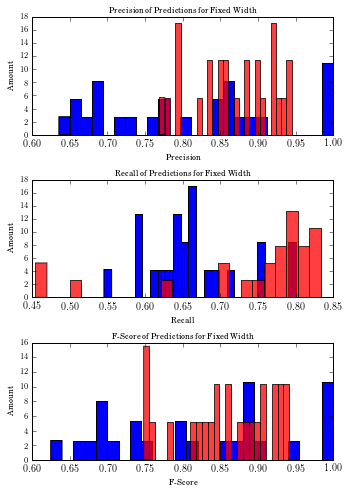

In [662]:
latexify(fig_height=6.9)
plt.subplot(3, 1, 1)
plt.title("Precision of Predictions for Fixed Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[:25]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.75, label='Band 7')

plt.subplot(3, 1, 2)
plt.title("Recall of Predictions for Fixed Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[:25]  if np.mean(means["Recall"]) > 0.3 and np.mean(means["Recall"]) < 1], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.75, label='Band 7')

plt.subplot(3, 1, 3)
plt.title("F-Score of Predictions for Fixed Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[:25]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.75, label='Band 7')

plt.tight_layout()
plt.savefig("images/hist1.pdf")

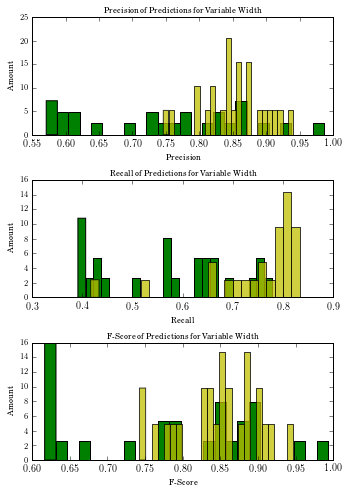

In [647]:
latexify(fig_height=6.9)

plt.subplot(3, 1, 1)
plt.title("Precision of Predictions for Variable Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[25:50]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.75, label='Band 7')

plt.subplot(3, 1, 2)
plt.title("Recall of Predictions for Variable Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[25:50]  if np.mean(means["Recall"]) > 0.3], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.75, label='Band 7')

plt.subplot(3, 1, 3)
plt.title("F-Score of Predictions for Variable Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[25:50]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.75, label='Band 7')

plt.tight_layout()
plt.savefig("images/hist2.pdf")

Blending case

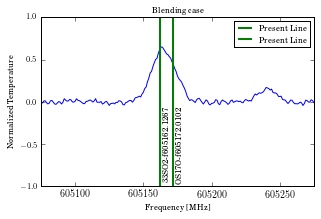

In [55]:
latexify()
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605075, xmax = 605275)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
current_isotopes = [""]
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605075, 605275) \
    and line[0] not in current_isotopes:
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency + 1.5, -0.125, isotope_name, size='8', rotation='vertical')
        current_isotopes.append(line[0])

plt.title("Blending case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.savefig("images/blending.pdf")

Hyperfine lines case

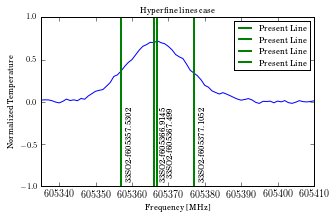

In [701]:
latexify()
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605335, xmax = 605410)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for i in range(0, len(lines)):
    isotope_frequency = int(lines[i][1])
    isotope_name = lines[i][0] + "-f" + str(lines[i][1])
    if isotope_frequency in range(605335, 605410):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        if (i == 27):
            plt.text(isotope_frequency + 1.5, -0.125, isotope_name, size='8', rotation='vertical')
        elif (i == 28):
            plt.text(isotope_frequency + 2.25, -0.125, isotope_name, size='8', rotation='vertical')
        else:
            plt.text(isotope_frequency + 1, -0.125, isotope_name, size='8', rotation='vertical')

plt.title("Hyperfine lines case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.savefig("images/hyperfine.pdf")

Double peaks for single Line

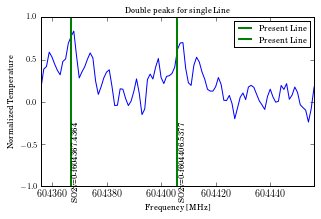

In [733]:
latexify()
file_path = "data/cube_fixed_width_1.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 604356, xmax = 604456)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(604356, 604456):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

plt.title("Double peaks for single Line")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.savefig("images/doublepeak.pdf")

In [29]:
np.mean([np.mean(means["F-Score"]) for means in results])

0.82696383556392095

In [30]:
# result9 = results.pop(9)

In [39]:
min_distance_req_list = pd.DataFrame([])
for i in range(0, 100):
    if (i == 0 or i == 50):
        cube_name = 'data/cube_fixed_width_'
    if (i == 25 or i == 75):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    lines = get_lines_from_fits(file_path)
       
    sorted_lines = sorted([lines[idx][1] for idx in range(0, len(lines) )])
    min_distance_req = True
    
    last_freq = float(sorted_lines[0])
    for idx in  range(1, len(sorted_lines)):
        distance = float(sorted_lines[idx]) - last_freq
                
        if(distance <= 1):
            min_distance_req = False
            break
        last_freq = float(sorted_lines[idx])
    
    if len(min_distance_req_list) == 0:
        if (min_distance_req):
            min_distance_req_list = [i]
    else:
        if (min_distance_req):
            min_distance_req_list.append(i)

In [40]:
min_distance_req_list


[0,
 1,
 3,
 5,
 7,
 11,
 12,
 14,
 16,
 17,
 18,
 20,
 21,
 30,
 32,
 33,
 35,
 36,
 37,
 39,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 53,
 54,
 55,
 57,
 61,
 62,
 64,
 66,
 67,
 68,
 70,
 71,
 75,
 78,
 79,
 80,
 82,
 86,
 87,
 89,
 91,
 92,
 95,
 96]

In [41]:
results_filtered = [results[min_distance_req_list[0]]]
for ix in min_distance_req_list[1:]:
    results_filtered.append(results[ix])

In [42]:
np.mean([np.mean(means["F-Score"]) for means in results_filtered])

0.8709341308285552

In [35]:
cf_filtered = [confusion_matrix[min_distance_req_list[0]]]
for ix in min_distance_req_list[1:]:
    cf_filtered.append(confusion_matrix[ix])

In [51]:
confusion_matrix[0]

,OS18O-f602313.3835,OS18O-f603090.155,OS18O-f603608.7849,H213CS-f602149.9892,34SO2v=0-f604376.563,34SO2v=0-f605499.8855,OS17O-f604501.9322,OS17O-f605172.0102,OS17O-f605240.925,H2C34S-f604710.9998
SO2v=0-f604367.4364,0,0,0,0,0.382845,0,0,0,0,0
33SO2-f602337.0627&&f602338.0039,0,0,0,0,0.000000,0,0,0,0,0
33SO2-f604736.5656&&f604736.767&&f604736.8741&&f604736.8962&&f604736.926&&f604736.9663&&f604736.9892,0,0,0,0,0.000000,0,0,0,0,0
34SO2v=0-f604376.563,0,0,0,0,0.617155,0,0,0,0,0
34SO2v=0-f604504.0028,0,0,0,0,0.000000,0,1,0,0,0
34SO2v=0-f605499.8855,0,0,0,0,0.000000,1,0,0,0,0
OS18O-f602313.3835,1,0,0,0,0.000000,0,0,0,0,0
OS18O-f603090.155,0,1,0,0,0.000000,0,0,0,0,0
OS18O-f603608.7849,0,0,1,0,0.000000,0,0,0,0,0
OS17O-f603105.7123&&f603106.5013,0,0,0,0,0.000000,0,0,0,0,0


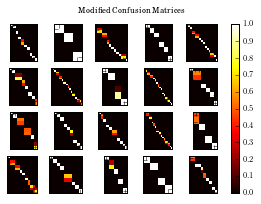

In [48]:
latexify()
n = 5
fig, axes = plt.subplots(nrows=4, ncols=5)
filtered_matrices = confusion_matrix[:20]
for ax, matrix in zip(axes.flat, filtered_matrices):
    
    order_index = np.argsort([float(f.split('f')[1].split('&')[0]) for f in matrix.index])
    order_columns = np.argsort([float(f.split('f')[1].split('&')[0]) for f in matrix.columns])
    im = ax.matshow(matrix[order_columns].iloc[order_index], cmap='hot')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

fig.suptitle("Modified Confusion Matrices")
fig.colorbar(im, ax=axes.ravel().tolist())
plt.savefig("images/confusion_matrix.pdf")

In [37]:
[np.mean(means["F-Score"]) for means in results_filtered]

[0.87632600245418124,
 1.0,
 1.0,
 0.79728854608696664,
 0.79590186108171623,
 0.81965678337688774,
 0.88345036329454274,
 0.90969423511685954,
 0.88587904035457199,
 0.88198334843232951,
 1.0,
 1.0,
 0.94664464525848047,
 0.78170822483553692,
 0.73345884900771885,
 0.8999960453139435,
 0.88427577126180013,
 0.95258764832078902,
 0.88275308293074006,
 0.7884096219733483,
 0.8306026375328448,
 0.78492860790080943,
 0.84347030909325149,
 0.84476289254971704,
 0.99323557065952184,
 0.84349886967679166,
 0.77888006863785553,
 0.84682561586707827,
 0.9009762307955036,
 0.89513930787239326,
 0.94172704690604603,
 0.93137289342345797,
 0.86035077378268998,
 0.93071336618528544,
 0.91037751932515476,
 0.91996269303219413,
 0.75736548559967842,
 0.83896780145486249,
 0.94651612632997251,
 0.88884715375777568,
 0.87913178036994888,
 0.88330465963492588,
 0.83705515278715692,
 0.85189213605320835,
 0.92089719458440933,
 0.79243154439078678]

In [420]:
[np.mean(means["F-Score"]) for means in results]

[0.87632600245418124,
 1.0,
 0.6938859006029181,
 1.0,
 0.6990889596642309,
 0.79728854608696664,
 0.702951460238734,
 0.79590186108171623,
 0.73548704452753544,
 0.85664394048373205,
 0.73586327240992477,
 0.81965678337688774,
 0.88345036329454274,
 0.67626731663527195,
 0.90969423511685954,
 0.68558789258127872,
 0.88587904035457199,
 0.88198334843232951,
 1.0,
 0.62475285330002861,
 1.0,
 0.94664464525848047,
 0.74794567878211815,
 0.66536377493655408,
 0.89421352533542664,
 0.86732630034639913,
 0.62035651953214188,
 0.67055353609773938,
 0.89787735236343946,
 0.61936556265307152,
 0.78170822483553692,
 0.6338823452628336,
 0.73345884900771885,
 0.8999960453139435,
 0.61667894180753613,
 0.88427577126180013,
 0.95258764832078902,
 0.88275308293074006,
 0.62810812622241063,
 0.7884096219733483,
 0.62253763265905337,
 0.8306026375328448,
 0.78492860790080943,
 0.84347030909325149,
 0.62208926269479192,
 0.84476289254971704,
 0.99323557065952184,
 0.84349886967679166,
 0.9015428733434

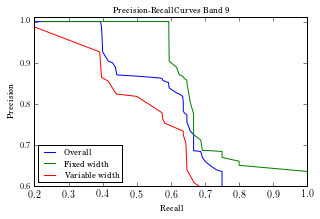

In [608]:
latexify()
# Plot Precision-Recall curve for each cube
precision_avg = [np.mean(means["Precision"]) for means in results[:50]]
recall_avg = [np.mean(means["Recall"]) for means in results[:50]]
area = simps(precision_avg, dx=0.01)
plt.clf()
plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
          label='Overall')
precision_avg = [np.mean(means["Precision"]) for means in results[:25]]
recall_avg = [np.mean(means["Recall"]) for means in results[:25]]
area = simps(precision_avg, dx=0.01)
plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
             label='Fixed width')
precision_avg = [np.mean(means["Precision"]) for means in results[25:50]]
recall_avg = [np.mean(means["Recall"]) for means in results[25:50]]
area = simps(precision_avg, dx=0.01)
plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
             label='Variable width ')

plt.xlim([0.2, 1.0])
plt.ylim([0.6, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Band 9')
plt.legend(loc="lower left")
plt.savefig("images/results1.pdf")

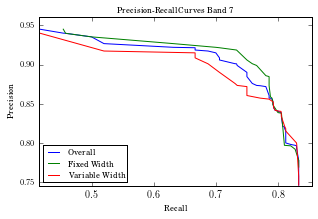

In [607]:
latexify()
# Plot Precision-Recall curve for each cube
from scipy.integrate import simps

precision_avg = [np.mean(means["Precision"]) for means in results[50:100]]
recall_avg = [np.mean(means["Recall"]) for means in results[50:100]]

area = simps(precision_avg, dx=0.01)
plt.clf()
plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
          label='Overall')
precision_avg = [np.mean(means["Precision"]) for means in results[50:75]]
recall_avg = [np.mean(means["Recall"]) for means in results[50:75]]
area = simps(precision_avg, dx=0.01)

plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
             label='Fixed Width')
precision_avg = [np.mean(means["Precision"]) for means in results[75:100]]
recall_avg = [np.mean(means["Recall"]) for means in results[75:100]]
area = simps(precision_avg, dx=0.01)

plt.plot(np.sort(recall_avg),
         -np.sort(-np.ones(1)*precision_avg),
             label='Variable Width ')

plt.xlim([0.415, 0.854])
plt.ylim([0.745, 0.96])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Band 7')
plt.legend(loc="lower left")
plt.savefig("images/results2.pdf")

In [646]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 4.89 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 24.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

